# DL CASE-STUDIES | NATURAL LANGUAGE PROCESSING (NLP)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

==========

## Spam Detection | Text Classification (NLP Case-study)

Dataset Source: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Importing & Inspecting Data

In [2]:
sms = pd.read_csv('spam.csv', encoding='ISO-8859-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Pre-processing Data

##### Basic Data Pre-processing

In [4]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [5]:
sms.columns = ['labels', 'data']

In [6]:
sms.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
X = sms['data']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: data, Length: 5572, dtype: object

In [8]:
y = sms['labels'].map({'ham': 0, 'spam': 1}).values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
sms.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

##### Text Pre-processing

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer   

In [12]:
tokenizer = Tokenizer(num_words=20000)

In [13]:
tokenizer.fit_on_texts(X_train)

In [15]:
seq_train = tokenizer.texts_to_sequences(X_train)
seq_train

[[1, 197, 87],
 [70,
  27,
  2254,
  33,
  325,
  7,
  265,
  1,
  35,
  702,
  6,
  27,
  163,
  3389,
  266,
  7,
  5,
  3390,
  15,
  2255,
  88,
  443],
 [142, 48, 9, 5, 1791, 198],
 [142, 1474, 8, 761, 326, 175],
 [90,
  99,
  151,
  109,
  181,
  515,
  2,
  135,
  422,
  192,
  92,
  28,
  550,
  5,
  2256,
  488,
  316,
  19,
  3391],
 [1,
  193,
  257,
  112,
  703,
  894,
  2257,
  74,
  25,
  10,
  6,
  222,
  238,
  118,
  45,
  77,
  18,
  895,
  372,
  129,
  55,
  615],
 [7, 26, 3, 17, 94, 74, 21, 31, 1268, 10, 50, 2, 2258, 1792],
 [817, 13, 516, 489, 2259, 3392],
 [277, 257, 15, 127, 2, 308, 210],
 [2260,
  3393,
  20,
  83,
  344,
  28,
  2261,
  27,
  266,
  616,
  983,
  344,
  2262,
  289,
  2,
  653,
  2,
  490,
  7,
  38,
  1793],
 [168,
  1475,
  63,
  1,
  56,
  62,
  373,
  24,
  1,
  17,
  3394,
  15,
  3395,
  7,
  3396,
  2,
  278,
  23,
  1,
  267,
  2,
  317,
  239,
  3397,
  7,
  2263,
  327],
 [50, 130, 9, 1794, 3398, 8, 1098],
 [121,
  374,
  1,
  267,


In [16]:
seq_test = tokenizer.texts_to_sequences(X_test)

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
data_train = pad_sequences(seq_train)
data_train

array([[   0,    0,    0, ...,    1,  197,   87],
       [   0,    0,    0, ..., 2255,   88,  443],
       [   0,    0,    0, ...,    5, 1791,  198],
       ...,
       [   0,    0,    0, ...,    5,  830,  151],
       [   0,    0,    0, ...,   23, 1956,   82],
       [   0,    0,    0, ...,   52,   75,    6]])

In [19]:
data_train.shape

(3733, 189)

In [20]:
data_test = pad_sequences(seq_test, maxlen=data_train.shape[1])
data_test

array([[   0,    0,    0, ...,  166,  591,  428],
       [   0,    0,    0, ...,  254,  151,    9],
       [   0,    0,    0, ..., 1700,   91,  177],
       ...,
       [   0,    0,    0, ...,   82,    7,  145],
       [   0,    0,    0, ..., 3606,  152, 1864],
       [   0,    0,    0, ..., 4983, 4984,   55]])

In [21]:
data_test.shape

(1839, 189)

## Exploring Data

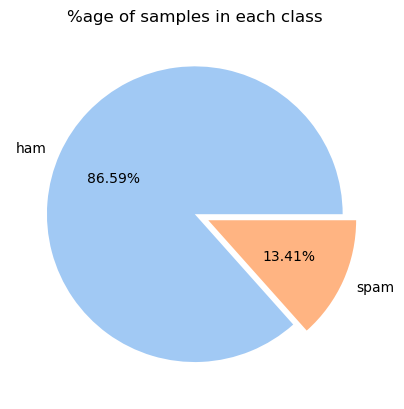

In [22]:
plt.title('%age of samples in each class')
plt.pie(sms['labels'].value_counts(),labels=['ham','spam'],colors=sns.color_palette('pastel'),explode=[0,0.1],autopct='%.2f%%')
plt.show()

<AxesSubplot:xlabel='labels', ylabel='count'>

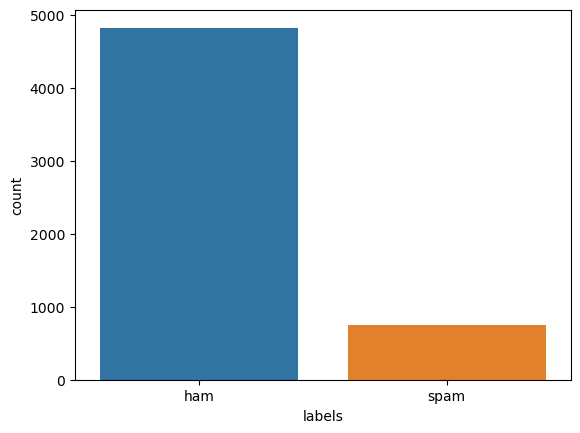

In [23]:
sns.countplot(x=sms['labels'])

## Model Training & Building 

In [24]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D 
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [25]:
# Input layer
i = Input(shape=(data_train.shape[1],))  # input layer takes in sequences of integers

# Embedding layer
x = Embedding(len(tokenizer.word_index) + 1, 20)(i) # This takes in sequences of integers and returns sequences of word vectors

# LSTM layer
x = LSTM(15, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)
# it is an binary classification problem, so we are using activation function ='sigmoid'

model = Model(i, x)

In [ ]:
'''
model=Sequential()

# embedding layer
model.add(Embedding(max_words,50,input_length=max_len,trainable=True))

# lstm layer
model.add(LSTM(100,return_sequences=True,dropout=0.5))
model.add(Flatten()) 

# Dense layer
model.add(Dense(200,activation='relu',name='hl1')) # hidden layer 1
model.add(Dense(100,activation='relu',name='hl2')) # hidden layer 2
model.add(Dense(1,activation='sigmoid',name='ol')) # output layer
'''

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
hist = model.fit(x=data_train, y=y_train, epochs=20, validation_data=(data_test, y_test))

Epoch 1/20
117/117 [==============================] - 23s 151ms/step - loss: 0.4786 - accuracy: 0.8602 - val_loss: 0.4070 - val_accuracy: 0.8592
Epoch 2/20
117/117 [==============================] - 16s 135ms/step - loss: 0.3845 - accuracy: 0.8693 - val_loss: 0.3992 - val_accuracy: 0.8592
Epoch 3/20
117/117 [==============================] - 16s 141ms/step - loss: 0.3521 - accuracy: 0.8693 - val_loss: 0.3338 - val_accuracy: 0.8592
Epoch 4/20
117/117 [==============================] - 17s 141ms/step - loss: 0.2338 - accuracy: 0.8693 - val_loss: 0.2183 - val_accuracy: 0.8592
Epoch 5/20
117/117 [==============================] - 16s 140ms/step - loss: 0.1411 - accuracy: 0.9582 - val_loss: 0.1635 - val_accuracy: 0.9657
Epoch 6/20
117/117 [==============================] - 16s 134ms/step - loss: 0.0873 - accuracy: 0.9936 - val_loss: 0.1450 - val_accuracy: 0.9663
Epoch 7/20
117/117 [==============================] - 16s 140ms/step - loss: 0.0577 - accuracy: 0.9962 - val_loss: 0.1369 - val_ac

## Model Evaluation

In [ ]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

==========

# THANK YOU!